In [28]:
from tensorflow.keras.datasets import mnist

dataset_photos = mnist.load_data()

In [29]:
(train_images, train_labels) , (test_images,test_labels) = dataset_photos

In [30]:
train_images.shape , train_labels.shape

((60000, 28, 28), (60000,))

In [31]:
import tensorflow as tf
keras = tf.keras





In [32]:
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [33]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [34]:
# we reshape data from 0-255 to float (0-1) to normalize the pixel values

train_images = train_images.reshape(60000, 28 * 28 )
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape(10000, 28 * 28)
test_images =  test_images.astype('float32') / 255 



In [35]:
train_images.shape

(60000, 784)

In [36]:
model.fit(train_images, train_labels , epochs = 5 , batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2652 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1061 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0702 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0378 - accuracy: 0.9885


In [37]:
test_digits = test_images[0:10]

test_digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 51ms/step


In [39]:
predictions[0].argmax()

7

In [40]:
predictions[0].argmax()

7

In [41]:
test_labels[0]

7

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_acc :', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9803
test_acc : 0.9803000092506409


In [43]:
from tensorflow.keras.datasets import mnist

dataset_photos = mnist.load_data()

(train_images,train_labels) , (test_images, test_labels) = dataset_photos

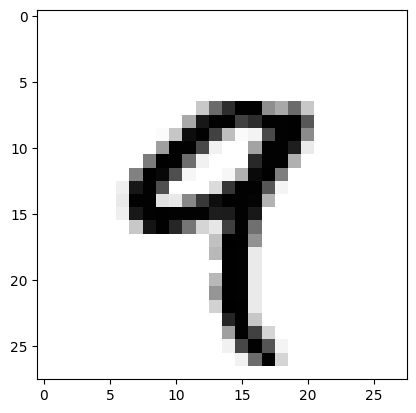

In [44]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

In [45]:
train_labels[4]

9

In [46]:
import tensorflow as tf


x = tf.Variable(tf.random.uniform((2, 2)))

In [47]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.40120304, 0.7080059 ],
       [0.18285453, 0.19738126]], dtype=float32)>

In [48]:
with tf.GradientTape() as tape:
    y = 2*x + 3
    grad_of_y_wrt_x = tape.gradient(y, x)
    
    print(grad_of_y_wrt_x) # the ouput shows how y will change (loss_func) when we change x 

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [53]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
print(W)
print(b)
print(x)
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b 
    grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
    
    display(grad_of_y_wrt_W_and_b)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.06352568, 0.5937128 ],
       [0.5381793 , 0.15477395]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
tf.Tensor(
[[0.37856615 0.07188118]
 [0.5514411  0.7951398 ]], shape=(2, 2), dtype=float32)


[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.9300072 , 0.9300072 ],
        [0.86702096, 0.86702096]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [54]:
from tensorflow.keras.datasets import mnist

dataset_photos = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = dataset_photos

In [55]:

train_images = train_images.reshape(60000, 28 * 28 )
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape(10000, 28 * 28)
test_images =  test_images.astype('float32') / 255 

In [57]:
import tensorflow as tf


class NaiveDense:
    
    def __init__(self,input_size, output_size, activation):
        self.activation  = activation
        
        w_shape = (input_size, output_size)
        
        w_initial_value = tf.random.uniform(w_shape , min_val = 0 , max_val = 1e-1)
        
        
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size)
        
        b_initial_value = tf.zeros(b_shape)
        
        self.b = tf.Variable(b_initial_value)
        
        
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b )

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self,inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        
        
        return x
    
    @property
    
    def weights(self):
        weights = []
        
        for layer in self.layers:
            weights+=layer.weights
        
        return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28 , output_size= 512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10 , activation=tf.nn.softmax)
])

In [ ]:
assert  len(model.weights) == 4